In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

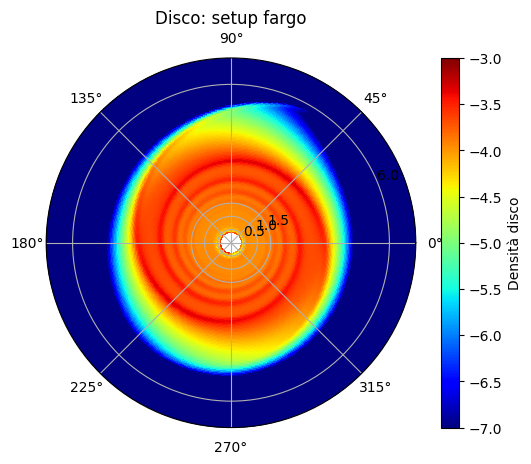

In [118]:
# Creare un grafico in coordinate polari
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
rho = np.fromfile("Dati/MassRatios/0.1/Primaria/gasdens20.dat").reshape(128, 384)

#Creo griglia polare
theta = np.linspace(-np.pi, np.pi, 384)
r = np.linspace(0.4, 7.0, 128)

# Creare una griglia di valori R e Theta
Theta, R = np.meshgrid(theta, r)

cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
plt.colorbar(cax, label='Densità disco')
plt.title("Disco: setup fargo")

# Imposto raggio max scala
ax.set_rmin(0.0)
ax.set_rmax(7.0)

#Imposto scala raggi
scala_raggi_desiderati = [0.5, 1.0, 1.5, 6.0]
ax.set_yticks(scala_raggi_desiderati)

# Mostrare il grafico
plt.show()

In [111]:
massa = 0

for i in range(0,128):
    #Calcolo area della singola sezione
    area = np.pi * (pow(((i+1)*(7.0-0.4)/128 + 0.4),2)-pow((i*(7.0-0.4)/128 + 0.4),2))
    area = area/384

    for j in range(0, 384):
        massa += area * rho[i, j]

#Controllo ora dove ottengo il 99% della massa
appo = 0
raggio = 0

for i in range(0,128):
    #Calcolo area della singola sezione
    area = np.pi * (pow(((i+1)*(7.0-0.4)/128 + 0.4),2)-pow((i*(7.0-0.4)/128 + 0.4),2))
    area = area/384

    raggio = (i+1)*(7.0-0.4)/128 + 0.4

    for j in range(0, 384):
        appo += area * rho[i, j]
    
    if appo >= 0.999*massa:
        break

print('Il raggio di troncamento del disco è pari a: ' + str(raggio/10) + ' a')

Il raggio di troncamento del disco è pari a: 0.43703125 a


<center>

# <span style="color:blue;">Investigo: spacing radiale</span>

<center>

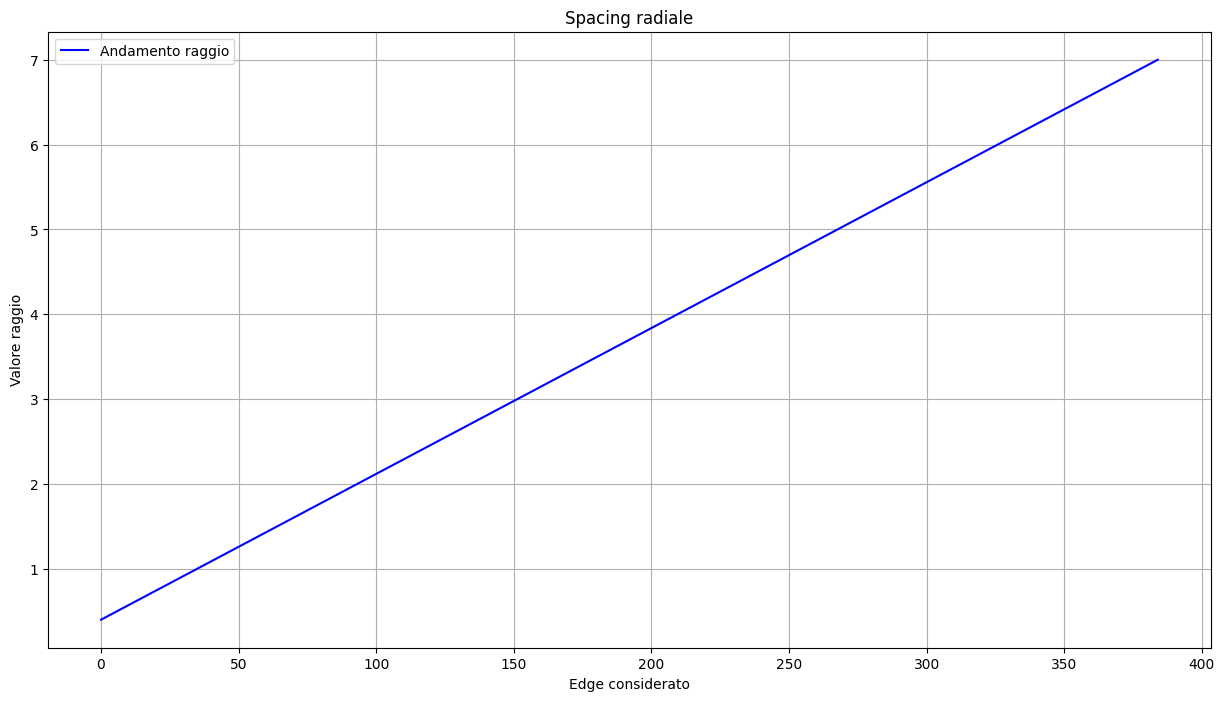

In [71]:
rag = np.loadtxt("used_rad.dat", unpack = True)

#Asse x
x = np.zeros(385)
for i in range(0, len(rag)):
    x[i] = i

plt.figure(figsize=(15, 8))
plt.plot(x, rag, color = 'blue', label = 'Andamento raggio')
plt.xlabel('Edge considerato')
plt.ylabel('Valore raggio')
plt.title('Spacing radiale')
plt.grid(True)
plt.legend()
plt.show()

L'andamento è quello di una griglia di tipo lineare: questo comporta che tutti gli output grafici che ho fatto fino ad adesso risultano essere rigorosi.

<center>

# <span style="color:blue;">Prova 1: mass ratios</span>

<center>

In [3]:
massr = np.array(['0.1', '0.33', '0.5', '0.75', '1'])

<center>

## Disco circum-primario

<center>

### Output finale

Riportiamo ora le condizioni iniziali che consentono di eseguire le simulazioni:

- q = 0.10:   Dimensioni griglia: 0.4 -> 7.0 (distanza fra stelle: 8.32)

- q = 0.33:   Dimensioni griglia: 0.4 -> 7.0 (distanza fra stelle: 10.1)

- q = 0.50:   Dimensioni griglia: 0.4 -> 7.0 (distanza fra stelle: 11.34)

- q = 0.75:   Dimensioni griglia: 0.4 -> 8.0 (distanza fra stelle: 13.24)

- q = 1.00:   Dimensioni griglia: 0.4 -> 8.0 (distanza fra stelle: 15.13)

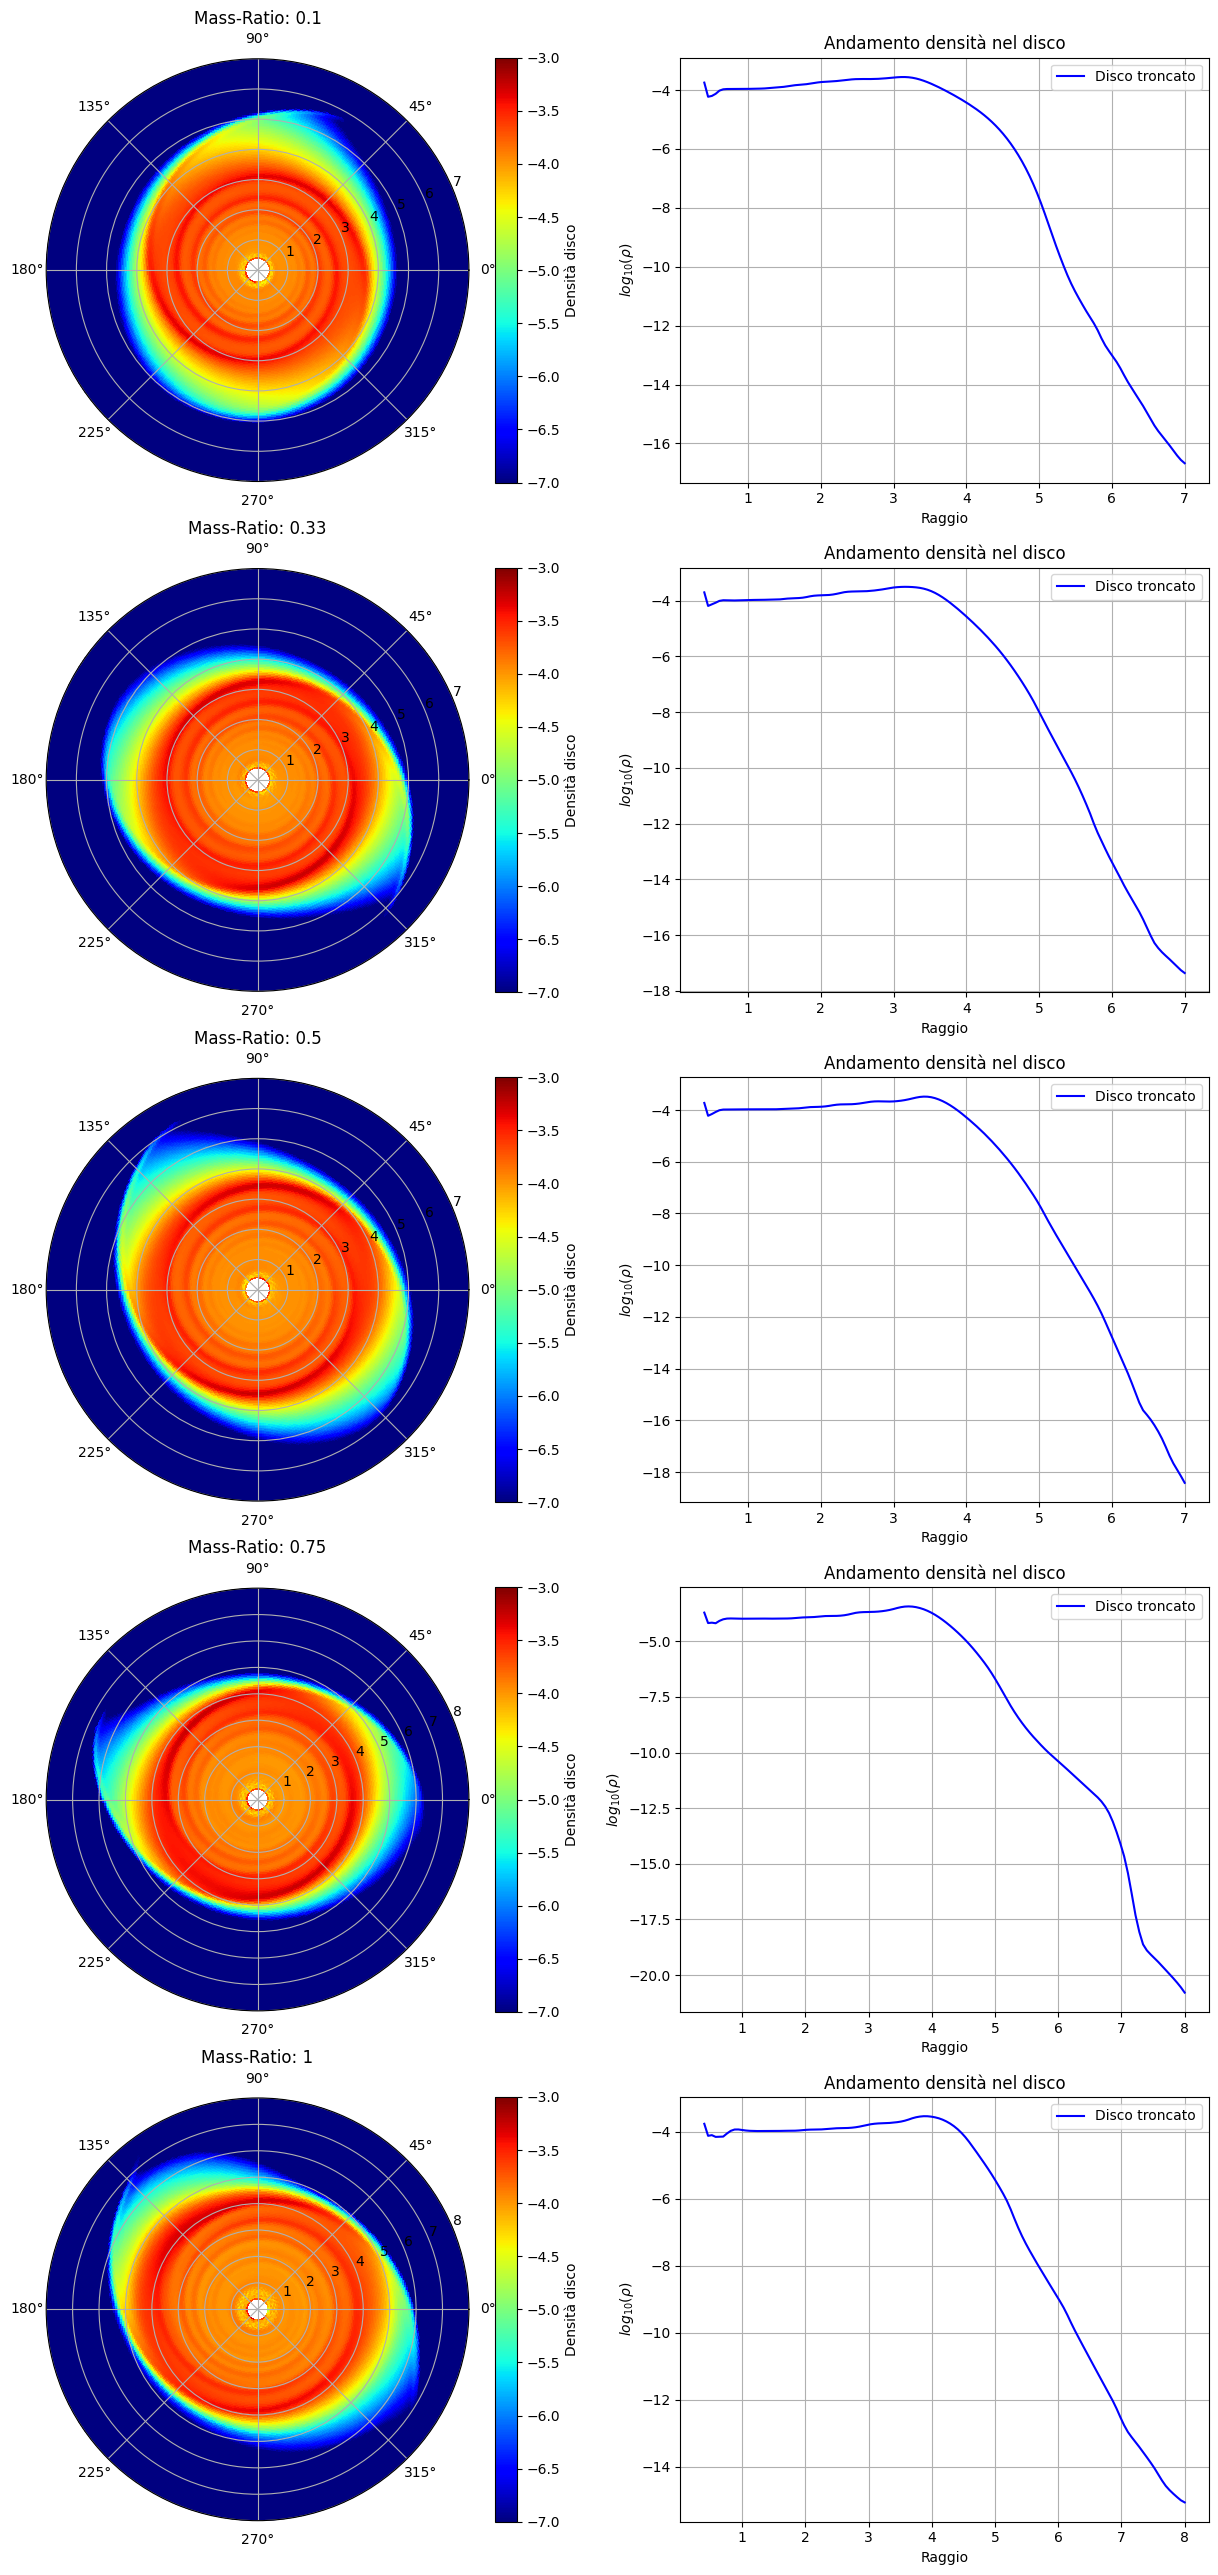

In [121]:
dim = np.array([7.0, 7.0, 7.0, 8.0, 8.0])

# Creare una figura con più grafici polari
fig = plt.figure(figsize=(15, 32))

for i in range(0, 5):

    #Valori assunti dalla densità
    rho = np.fromfile("Dati/MassRatios/" + massr[i] + "/Primaria/gasdens20.dat").reshape(128, 384)

    for j in range(0, 2):

        if (2*i + j)%2 == 0:
            ax = fig.add_subplot(5, 2, 2*i + j+1, projection='polar')

            # Creare una griglia di valori R e Theta
            theta = np.linspace(-np.pi, np.pi, 384)
            r = np.linspace(0.4, dim[i], 128)
            Theta, R = np.meshgrid(theta, r)

            #Disegnare il grafico polare
            cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
            plt.colorbar(cax, label='Densità disco')
            ax.set_rmin(0)
            ax.set_rmax(dim[i])
            ax.set_title(f'Mass-Ratio: ' + massr[i])

        else:
            #Grafico 2
            ax = fig.add_subplot(5, 2, 2*i+j+1)
            den_sup = np.zeros(128)

            #Determino andamento della densità superficiale
            for k in range(0, 128):
                appo = 0
                for h in range(0, 384):
                    appo += np.log10(rho[k, h])

                appo = appo/384
                den_sup[k] = appo

            ax.plot(np.linspace(0.4, dim[i], 128), den_sup[:], color = 'blue', label = 'Disco troncato')
            ax.set_title('Andamento densità nel disco')
            ax.set_xlabel('Raggio')
            ax.set_ylabel(r'$log_{10}(\rho)$')
            ax.grid(True)
            ax.legend()
    
    

# Mostrare la figura con i grafici polari multipli
plt.show()

### Raggio

In [125]:
num = np.array([11, 11, 11, 11, 11])
dim = np.array([7.0, 7.0, 7.0, 8.0, 8.0])
dist = np.array([8.32, 10.1, 11.34, 13.24, 15.13])

for h in range(0, 5):
    rag = np.zeros(num[h])

    for k in range(0, num[h]):
        #Importo la densità considerata
        rho = np.fromfile("Dati/MassRatios/" + str(massr[h]) + "/Primaria/gasdens"+ str(k+10) + ".dat").reshape(128, 384)
        massa = 0

        for i in range(0,128):
            #Calcolo area della singola sezione
            area = np.pi * (pow(((i+1)*(dim[h]-0.4)/128 + 0.4),2)-pow((i*(dim[h]-0.4)/128 + 0.4),2))
            area = area/384

            for j in range(0, 384):
                massa += area * rho[i, j]

        #Controllo ora dove ottengo il 90% della massa
        appo = 0
        raggio = 0

        for i in range(0,128):
            #Calcolo area della singola sezione
            area = np.pi * (pow(((i+1)*(dim[h]-0.4)/128 + 0.4),2)-pow((i*(dim[h]-0.4)/128 + 0.4),2))
            area = area/384

            raggio = (i+1)*(dim[h]-0.4)/128 + 0.4

            for j in range(0, 384):
                appo += area * rho[i, j]
    
            if appo >= 0.999*massa:
                rag[k] = raggio
                break

    med = 0
    for i in range(0, len(rag)):
        med += rag[i]

    print('Il raggio di troncamento del disco con Mass-ratio =  ' + massr[h] + ' è pari a: ' + str(round(med/len(rag)/dist[h], 3)) + ' a')

Il raggio di troncamento del disco con Mass-ratio =  0.1 è pari a: 0.584 a
Il raggio di troncamento del disco con Mass-ratio =  0.33 è pari a: 0.492 a
Il raggio di troncamento del disco con Mass-ratio =  0.5 è pari a: 0.453 a
Il raggio di troncamento del disco con Mass-ratio =  0.75 è pari a: 0.415 a
Il raggio di troncamento del disco con Mass-ratio =  1 è pari a: 0.385 a


<center>

## Disco circum-secondario

<center>

Riportiamo ora le condizioni iniziali che consentono di eseguire le simulazioni:

- q = 0.10:   Dimensioni griglia: 0.4 -> 3.5 (tempo di esecuzione - veramente eterno)

- q = 0.33:   Dimensioni griglia: 0.4 -> 4.0

- q = 0.50:   Dimensioni griglia: 0.4 -> 4.0 (tempo di esecuzione - circa 16:30 ore su due cores)

- q = 0.75:   Dimensioni griglia: 0.4 -> 4.5 (tempo di esecuzione - molto lungo, non sono sicuro di aver eseguito su sei cores)

- q = 1.00:   Dimensioni griglia: 0.4 -> 4.5 (tempo di esecuzione - circa 6 ore su 6 cores)

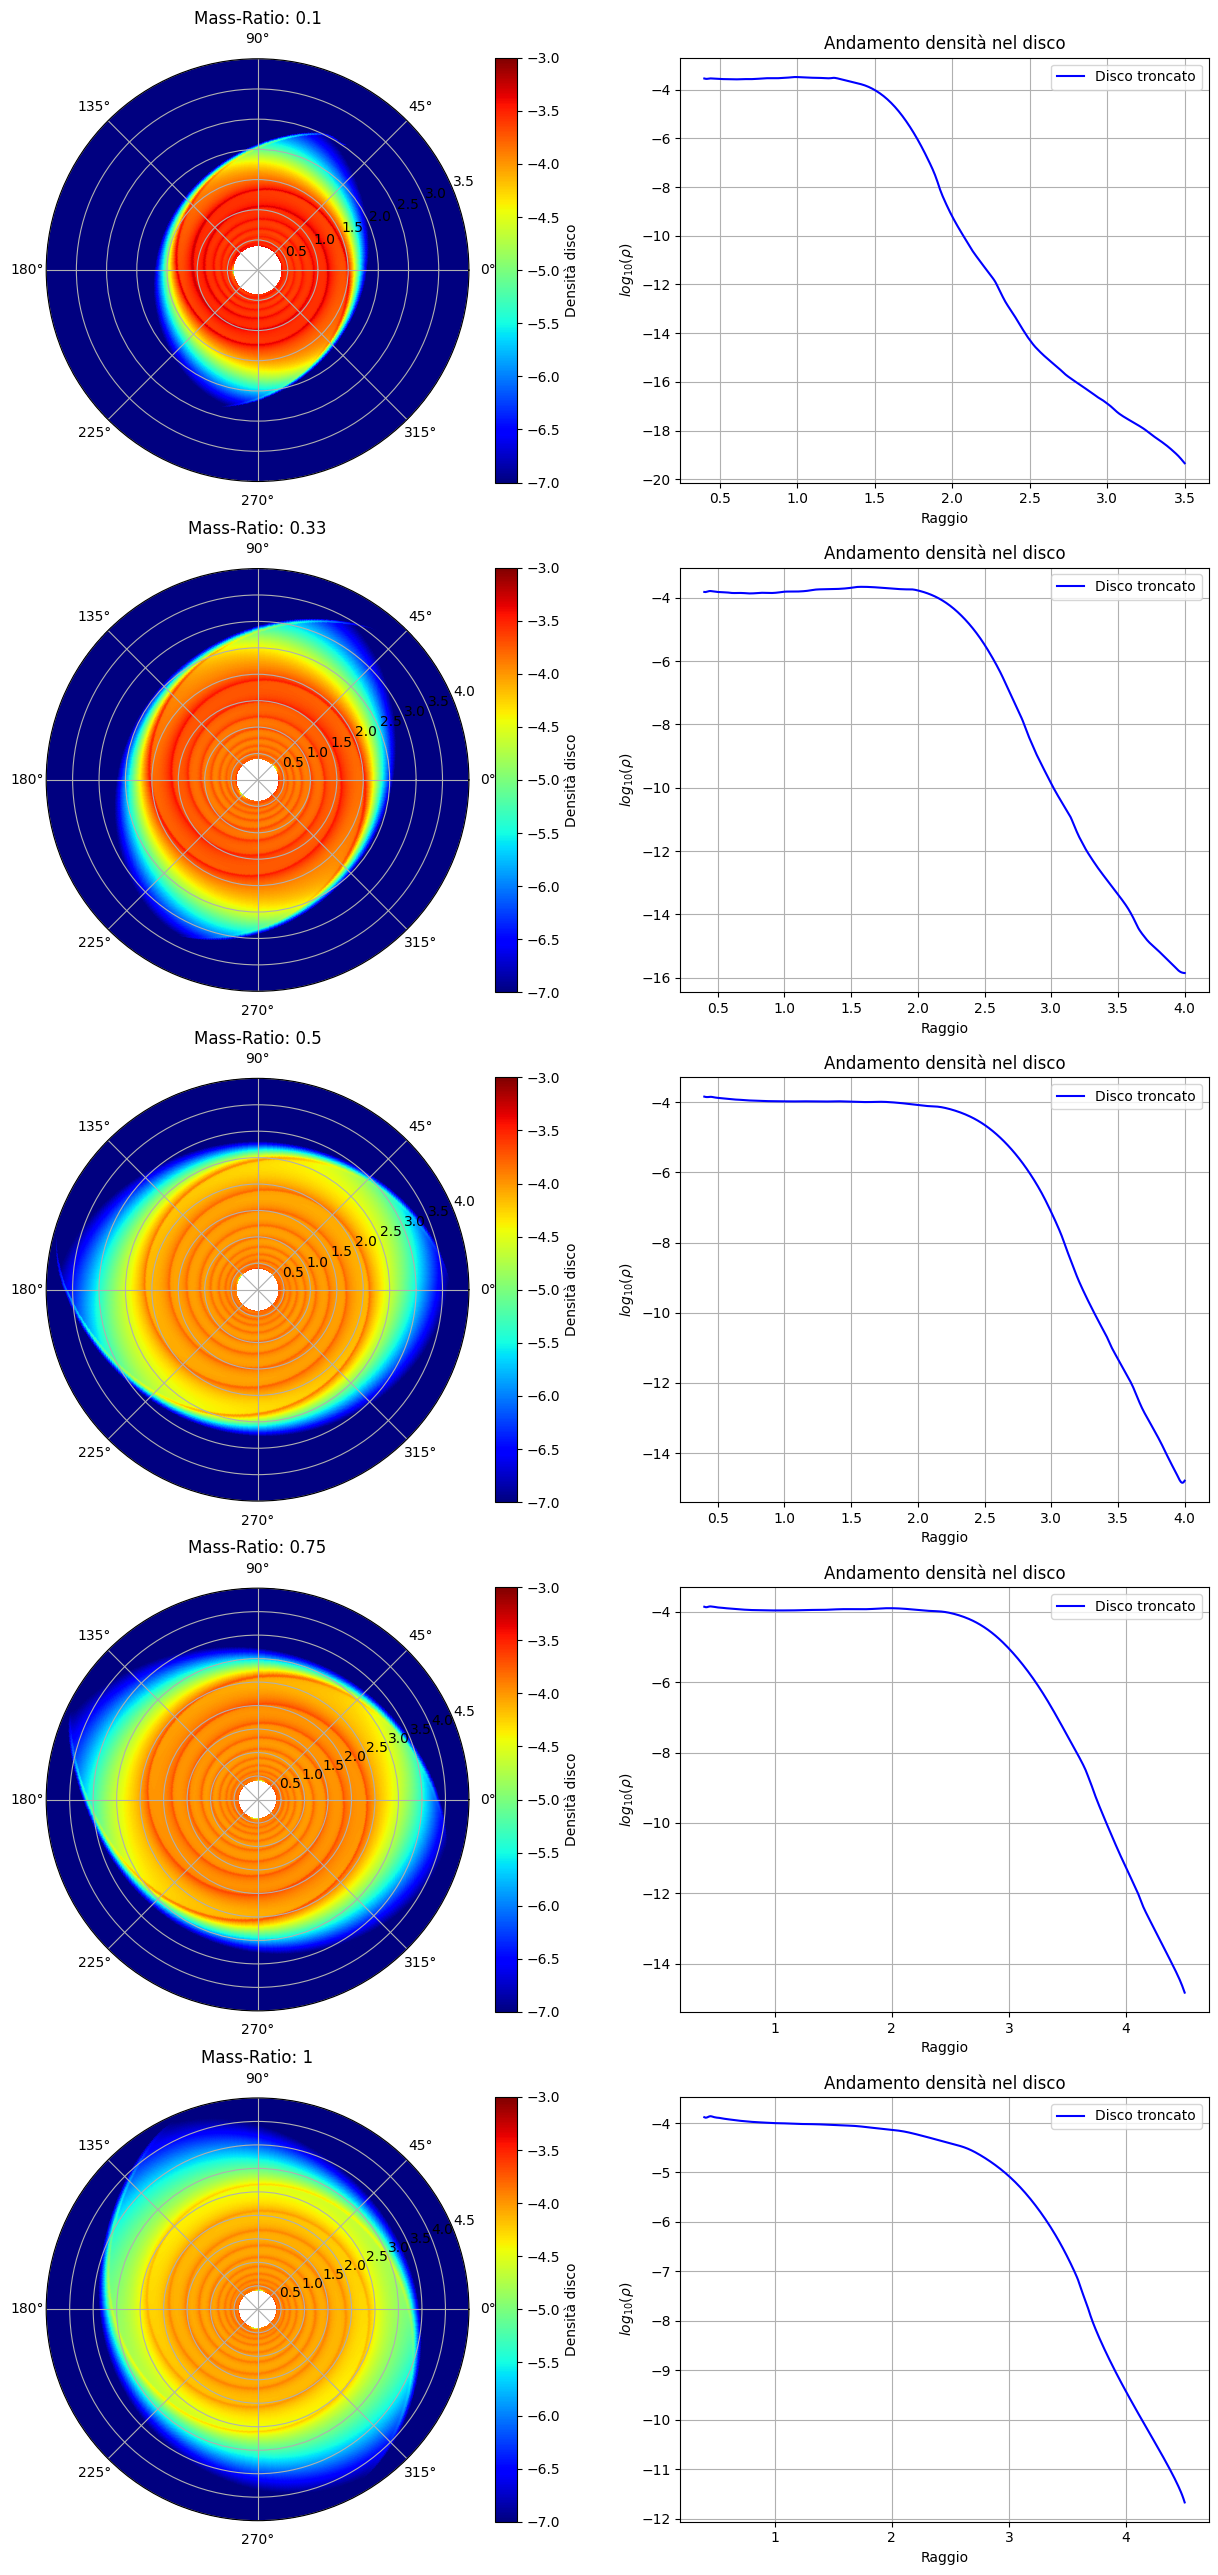

In [45]:
#Parametri per output
rmax = np.array([3.5, 4.0, 4.0, 4.5, 4.5])
nome = np.array(['35', '40', '40', '40', '40'])

# Creare una figura con più grafici polari
fig = plt.figure(figsize=(15, 32))

for i in range(0, 5):
    for j in range(0, 2):

        #Valori assunti dalla funzione
        rho = np.fromfile("Dati/MassRatios/" + str(massr[i]) + "/Secondaria/gasdens" + nome[i] + ".dat").reshape(384, 1152)

        if (2*i + j)%2 == 0:
            # Creare una griglia di valori R e Theta
            theta = np.linspace(-np.pi, np.pi, 1152)
            r = np.linspace(0.4, rmax[i], 384)
            Theta, R = np.meshgrid(theta, r)

            ax = fig.add_subplot(5, 2, 2*i + j+1, projection='polar')

            #Disegnare il grafico polare
            cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
            plt.colorbar(cax, label='Densità disco')
            ax.set_rmin(0)
            ax.set_rmax(rmax[i])
            ax.set_title(f'Mass-Ratio: ' + str(massr[i]))

        else:
            #Grafico 2
            ax = fig.add_subplot(5, 2, 2*i+j+1)
            den_sup = np.zeros(384)

            #Determino andamento della densità superficiale
            for k in range(0, 384):
                appo = 0
                for h in range(0, 1152):
                    appo += np.log10(rho[k, h])

                appo = appo/1152
                den_sup[k] = appo

            ax.plot(np.linspace(0.4, rmax[i], 384), den_sup[:], color = 'blue', label = 'Disco troncato')
            ax.set_title('Andamento densità nel disco')
            ax.set_xlabel('Raggio')
            ax.set_ylabel(r'$log_{10}(\rho)$')
            ax.grid(True)
            ax.legend()
    
    

# Mostrare la figura con i grafici polari multipli
plt.show()

### Raggi

In [4]:
num = np.array([16, 21, 21, 21, 21])
rmax = np.array([3.5, 4.0, 4.0, 4.5, 4.5])

for h in range(0, 5):
    rag = np.zeros(num[h])

    for k in range(0, num[h]):
        #Importo la densità considerata
        rho = np.fromfile("Dati/MassRatios/" + str(massr[h]) + "/Secondaria/gasdens"+ str(num[h]+19) + ".dat").reshape(384, 1152)
        massa = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(((i+1)*(rmax[h]-0.4)/384 + 0.4),2)-pow((i*(rmax[h]-0.4)/384 + 0.4),2))
            area = area/1152

            for j in range(0, 1152):
                massa += area * rho[i, j]

        #Controllo ora dove ottengo il 90% della massa
        appo = 0
        raggio = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(((i+1)*(rmax[h]-0.4)/384 + 0.4),2)-pow((i*(rmax[h]-0.4)/384 + 0.4),2))
            area = area/1152

            raggio = (i+1)*(rmax[h]-0.4)/384 + 0.4

            for j in range(0, 1152):
                appo += area * rho[i, j]
    
            if appo >= 0.999*massa:
                rag[k] = raggio
                break

    med = 0
    for i in range(0, len(rag)):
        med += rag[i]

    print('Il raggio di troncamento del disco con Mass-ratio =  ' + massr[h] + ' è pari a: ' + str(round(med/len(rag)/12, 3)) + ' a')

Il raggio di troncamento del disco con Mass-ratio =  0.1 è pari a: 0.163 a
Il raggio di troncamento del disco con Mass-ratio =  0.33 è pari a: 0.235 a
Il raggio di troncamento del disco con Mass-ratio =  0.5 è pari a: 0.261 a
Il raggio di troncamento del disco con Mass-ratio =  0.75 è pari a: 0.296 a
Il raggio di troncamento del disco con Mass-ratio =  1 è pari a: 0.305 a


<center>

# <span style="color:blue;">Prova 2: eccentricità </span>

<center>

In [127]:
ecc = np.array(['0.15', '0.3', '0.45', '0.60', '0.75'])

<center>

## Circum-primario

<center>

Riportiamo ora le condizioni iniziali che consentono di eseguire le simulazioni:

- e = 0.15: Dimensioni griglia: 0.4 -> 6.0

- e = 0.30: Dimensioni griglia: 0.4 -> 5.0  

- e = 0.45: Dimensioni griglia: 0.4 -> 5.0

- e = 0.60: Dimensioni griglia: 0.4 -> 4.0

- e = 0.75: Dimensioni griglia: 0.4 -> 4.0

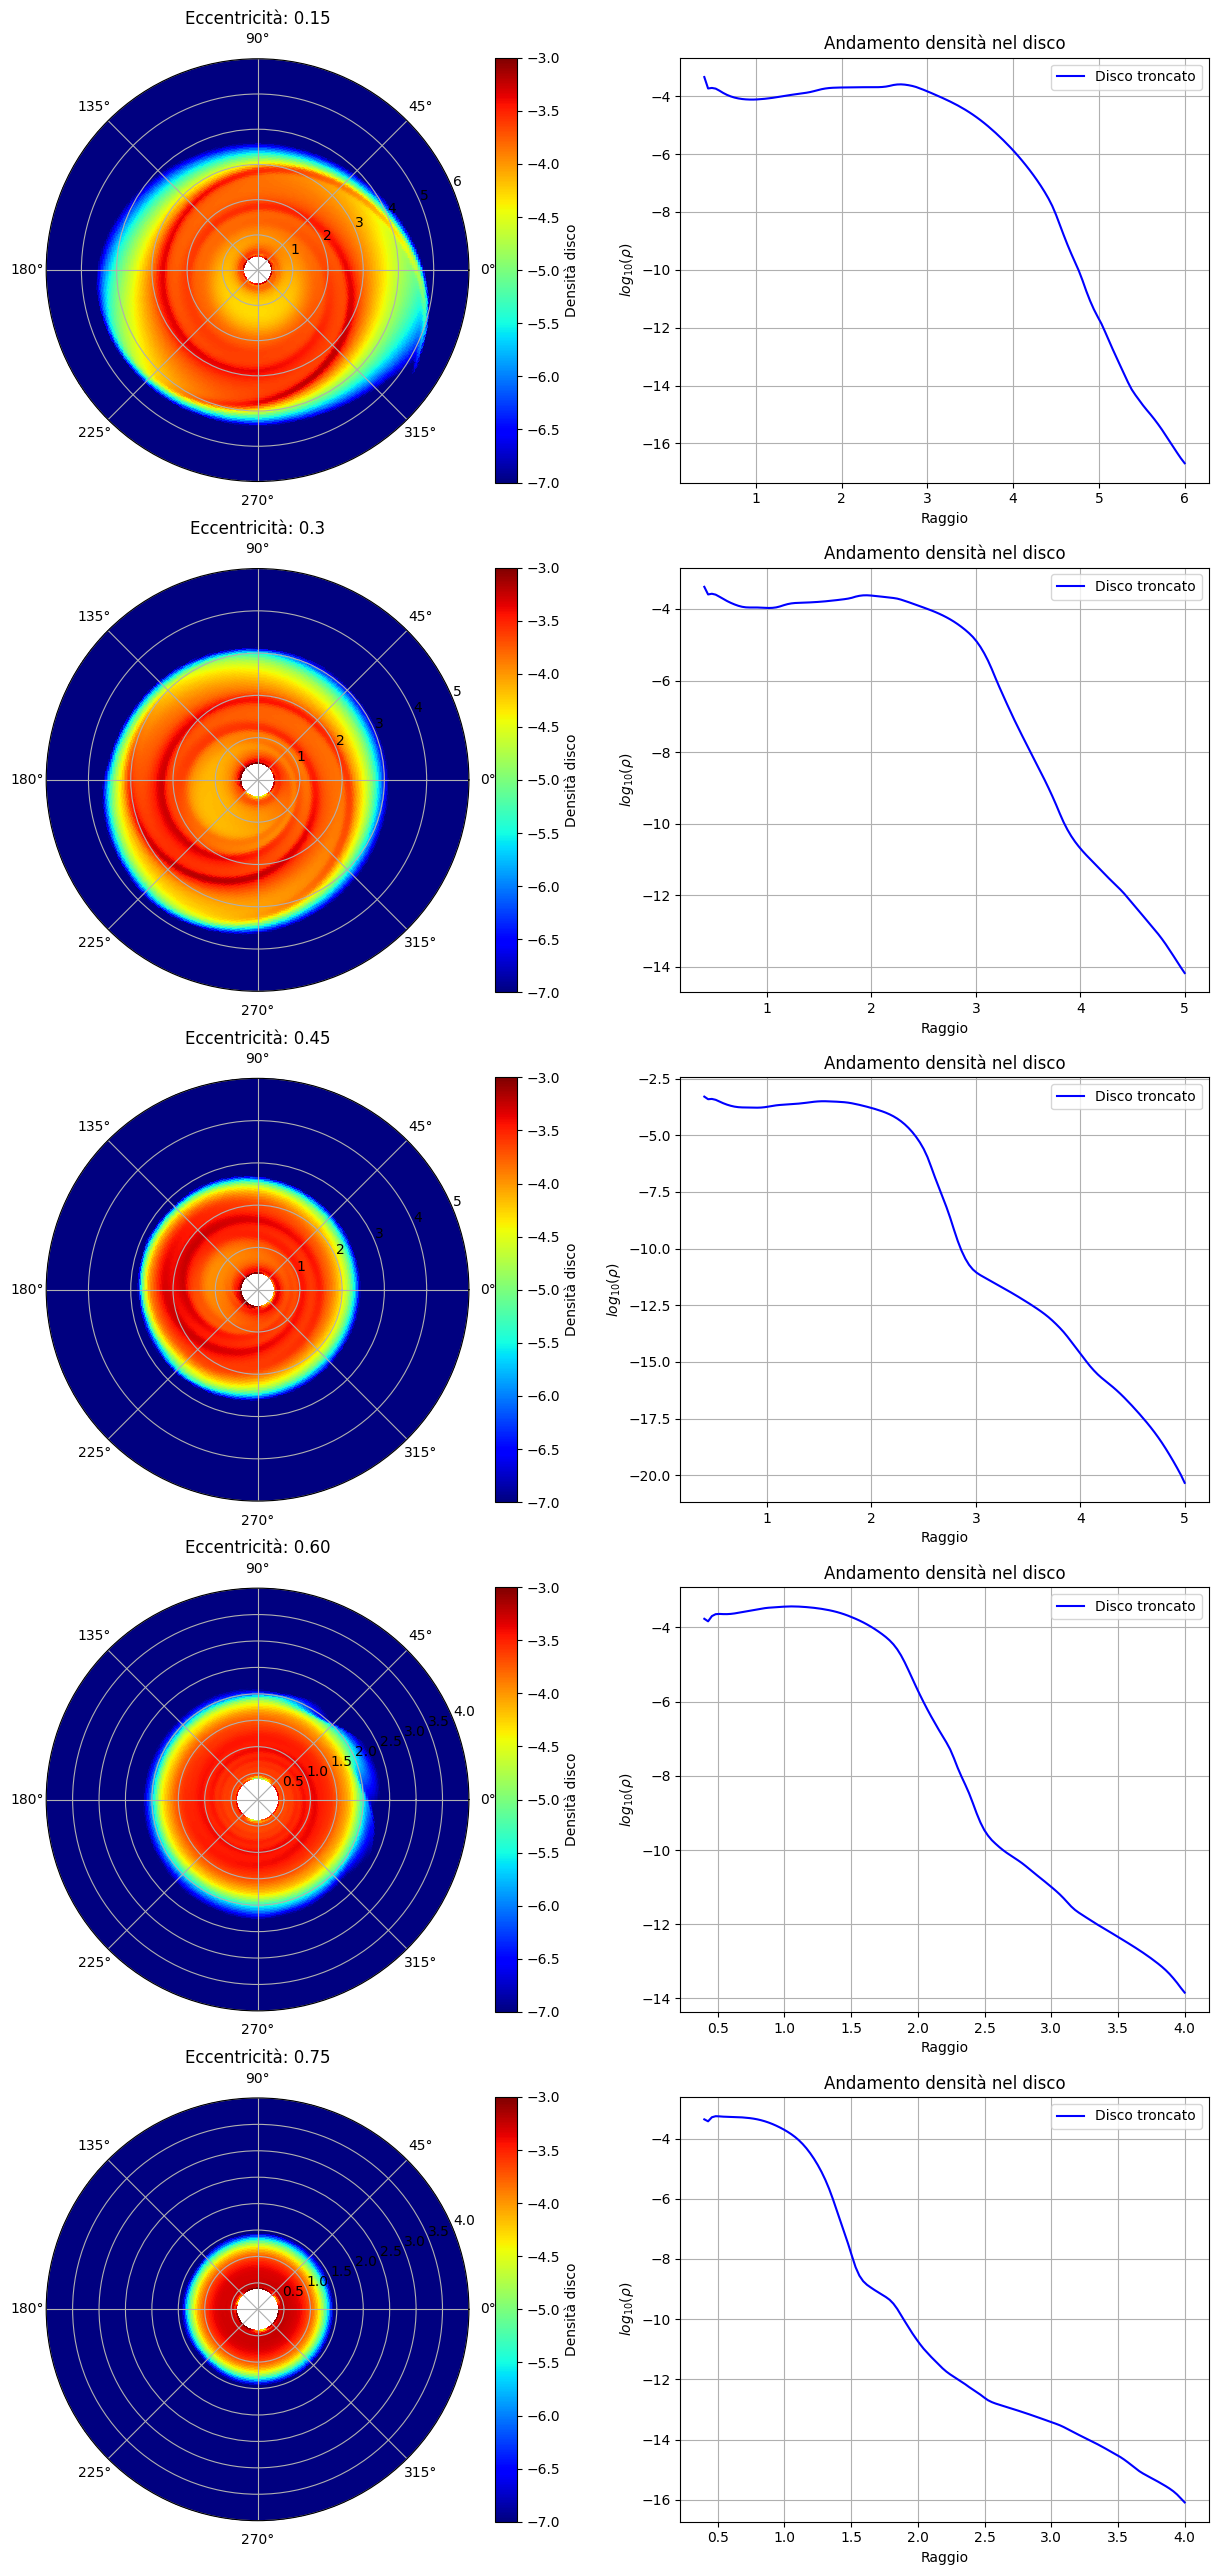

In [129]:
# Creare una figura con più grafici polari
fig = plt.figure(figsize=(15, 32))
rmax = np.array([6.0, 5.0, 5.0, 4.0, 4.0])


for i in range(0, 5):
    for j in range(0, 2):

        # Creare una griglia di valori R e Theta
        theta = np.linspace(-np.pi, np.pi, 384)
        r = np.linspace(0.4, rmax[i], 128)
        Theta, R = np.meshgrid(theta, r)

        if (2*i + j)%2 == 0:
            ax = fig.add_subplot(5, 2, 2*i + j+1, projection='polar')

            #Valori assunti dalla funzione
            rho = np.fromfile("Dati/Eccentricity/" + ecc[i] + "/Primaria/gasdens20.dat").reshape(128, 384)

            #Disegnare il grafico polare
            cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
            plt.colorbar(cax, label='Densità disco')
            ax.set_rmin(0)
            ax.set_rmax(rmax[i])
            ax.set_title(f'Eccentricità: ' + ecc[i])

        else:
            #Grafico 2
            ax = fig.add_subplot(5, 2, 2*i+j+1)
            den_sup = np.zeros(128)

            #Determino andamento della densità superficiale
            for k in range(0, 128):
                appo = 0
                for h in range(0, 384):
                    appo += np.log10(rho[k, h])

                appo = appo/384
                den_sup[k] = appo

            ax.plot(np.linspace(0.4, rmax[i], 128), den_sup[:], color = 'blue', label = 'Disco troncato')
            ax.set_title('Andamento densità nel disco')
            ax.set_xlabel('Raggio')
            ax.set_ylabel(r'$log_{10}(\rho)$')
            ax.grid(True)
            ax.legend()
    
    

# Mostrare la figura con i grafici polari multipli
plt.show()

### Raggio

In [133]:
num = np.array([11, 11, 11, 11, 11])
dist = np.array([10.1, 10.1, 10.1, 10.1, 10.1])
dim = np.array([6.0, 5.0, 5.0, 4.0, 4.0])

for h in range(0, 5):
    rag = np.zeros(num[h])

    for k in range(0, num[h]):
        #Importo la densità considerata
        rho = np.fromfile("Dati/Eccentricity/" + ecc[h] + "/Primaria/gasdens"+ str(k+10) + ".dat").reshape(128, 384)
        massa = 0

        for i in range(0,128):
            #Calcolo area della singola sezione
            area = np.pi * (pow(((i+1)*(dim[h]-0.4)/128 + 0.4),2)-pow((i*(dim[h]-0.4)/128 + 0.4),2))
            area = area/384

            for j in range(0, 384):
                massa += area * rho[i, j]

        #Controllo ora dove ottengo il 90% della massa
        appo = 0
        raggio = 0

        for i in range(0,128):
            #Calcolo area della singola sezione
            area = np.pi * (pow(((i+1)*(dim[h]-0.4)/128 + 0.4),2)-pow((i*(dim[h]-0.4)/128 + 0.4),2))
            area = area/384

            raggio = (i+1)*(dim[h]-0.4)/128 + 0.4

            for j in range(0, 384):
                appo += area * rho[i, j]
    
            if appo >= 0.999*massa:
                rag[k] = raggio
                break

    med = 0
    for i in range(0, len(rag)):
        med += rag[i]

    print('Il raggio di troncamento del disco con eccentricità =  ' + ecc[h] + ' è pari a: ' + str(round(med/len(rag)/dist[h], 3)) + ' a')

Il raggio di troncamento del disco con eccentricità =  0.15 è pari a: 0.438 a
Il raggio di troncamento del disco con eccentricità =  0.3 è pari a: 0.349 a
Il raggio di troncamento del disco con eccentricità =  0.45 è pari a: 0.273 a
Il raggio di troncamento del disco con eccentricità =  0.60 è pari a: 0.201 a
Il raggio di troncamento del disco con eccentricità =  0.75 è pari a: 0.133 a


<center>

## Circum-secondario

<center>

Riportiamo ora le condizioni iniziali che consentono di eseguire le simulazioni:

- e = 0.15: Dimensioni griglia: 0.4 -> 3.3

- e = 0.30: Dimensioni griglia: 0.4 -> 3.0 (tempo di esecuzione: circa 20 ore, su due cores)

- e = 0.45: Dimensioni griglia: 0.4 -> 3.0  (tempo di esecuzione: circa 20 ore, su due cores)

- e = 0.60: Dimensioni griglia: 0.4 -> 2.5 (tempo di esecuzione: eterno)

- e = 0.75: Dimensioni griglia: 0.4 -> 2.5 (tempo di esecuzione: 8 ore su 20 cores!!!)

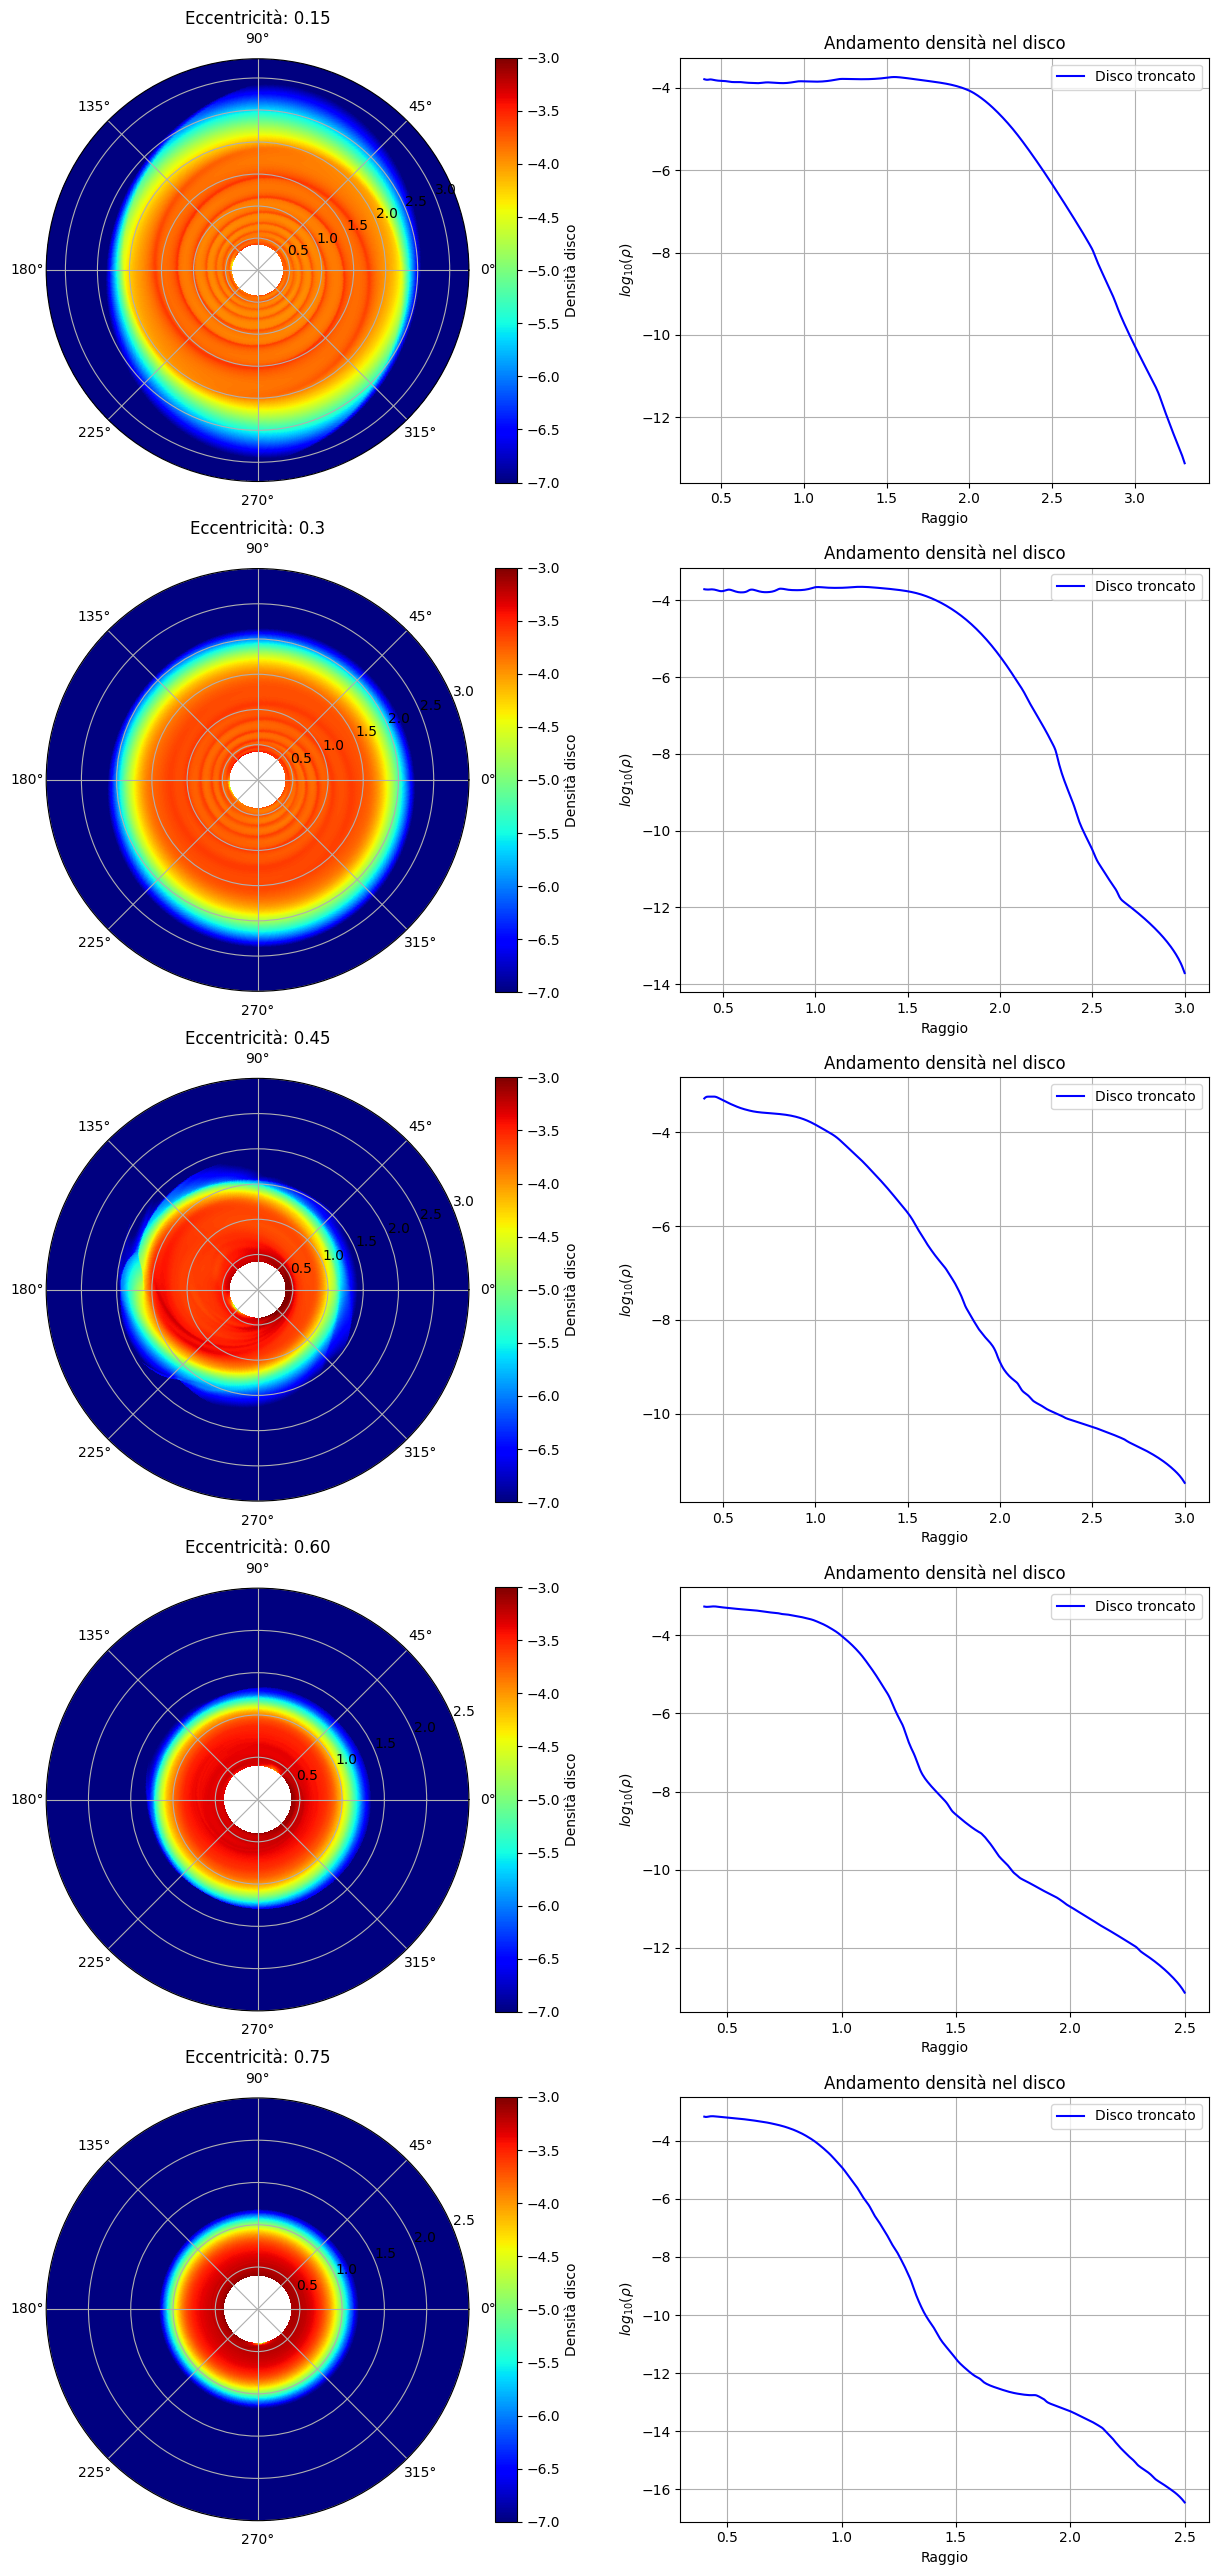

In [135]:
# Creare una figura con più grafici polari
fig = plt.figure(figsize=(15, 32))
dim  = np.array([3.3, 3.0, 3.0, 2.5, 2.5])

for i in range(0, 5):
    for j in range(0, 2):

        # Creare una griglia di valori R e Theta
        theta = np.linspace(-np.pi, np.pi, 1152)
        r = np.linspace(0.4, dim[i], 384)
        Theta, R = np.meshgrid(theta, r)

        if (2*i + j)%2 == 0:
            ax = fig.add_subplot(5, 2, 2*i + j+1, projection='polar')

            #Valori assunti dalla funzione
            rho = np.fromfile("Dati/Eccentricity/" + ecc[i] + "/Secondaria/gasdens20.dat").reshape(384, 1152)

            #Disegnare il grafico polare
            cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
            plt.colorbar(cax, label='Densità disco')
            ax.set_rmin(0)
            ax.set_rmax(dim[i])
            ax.set_title(f'Eccentricità: ' + ecc[i])

        else:
            #Grafico 2
            ax = fig.add_subplot(5, 2, 2*i+j+1)
            den_sup = np.zeros(384)

            #Determino andamento della densità superficiale
            for k in range(0, 384):
                appo = 0
                for h in range(0, 1152):
                    appo += np.log10(rho[k, h])

                appo = appo/1152
                den_sup[k] = appo

            ax.plot(np.linspace(0.4, dim[i], 384), den_sup[:], color = 'blue', label = 'Disco troncato')
            ax.set_title('Andamento densità nel disco')
            ax.set_xlabel('Raggio')
            ax.set_ylabel(r'$log_{10}(\rho)$')
            ax.grid(True)
            ax.legend()
    
    

# Mostrare la figura con i grafici polari multipli
plt.show()

### Raggio

In [137]:
num = np.array([11, 11, 11, 11, 11])
dist = np.array([12, 12, 12, 12, 12, 12])
dim = np.array([3.3, 3.0, 3.0, 2.5, 2.5])

for h in range(0, 5):
    rag = np.zeros(num[h])

    for k in range(0, num[h]):
        #Importo la densità considerata
        rho = np.fromfile("Dati/Eccentricity/" + ecc[h] + "/Secondaria/gasdens"+ str(k+10) + ".dat").reshape(384, 1152)
        massa = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(((i+1)*(dim[h]-0.4)/384 + 0.4),2)-pow((i*(dim[h]-0.4)/384 + 0.4),2))
            area = area/1152

            for j in range(0, 1152):
                massa += area * rho[i, j]

        #Controllo ora dove ottengo il 90% della massa
        appo = 0
        raggio = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(((i+1)*(dim[h]-0.4)/384 + 0.4),2)-pow((i*(dim[h]-0.4)/384 + 0.4),2))
            area = area/1152

            raggio = (i+1)*(dim[h]-0.4)/384 + 0.4

            for j in range(0, 1152):
                appo += area * rho[i, j]
    
            if appo >= 0.999*massa:
                rag[k] = raggio
                break

    med = 0
    for i in range(0, len(rag)):
        med += rag[i]

    print('Il raggio di troncamento del disco con eccentricità =  ' + ecc[h] + ' è pari a: ' + str(round(med/len(rag)/dist[h], 3)) + ' a')

Il raggio di troncamento del disco con eccentricità =  0.15 è pari a: 0.212 a
Il raggio di troncamento del disco con eccentricità =  0.3 è pari a: 0.175 a
Il raggio di troncamento del disco con eccentricità =  0.45 è pari a: 0.144 a
Il raggio di troncamento del disco con eccentricità =  0.60 è pari a: 0.102 a
Il raggio di troncamento del disco con eccentricità =  0.75 è pari a: 0.085 a


<center>

# <span style="color:blue;">Viscosità: passo da Nu ad Alpha </span>

<center>

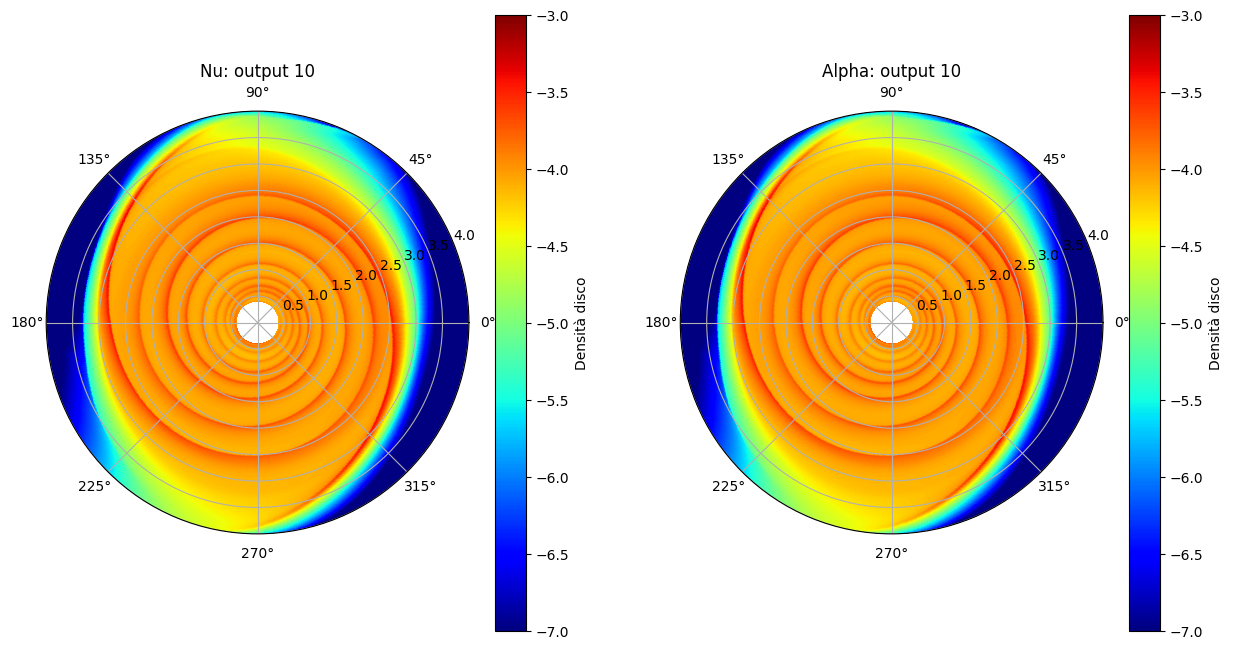

In [145]:
fig = plt.figure(figsize=(15, 8))

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 1152)
r = np.linspace(0.4, 4, 384)
Theta, R = np.meshgrid(theta, r)

ax = fig.add_subplot(1, 2, 1, projection='polar')

#Valori assunti dalla funzione
rho = np.fromfile("prova/gasdens10.dat").reshape(384, 1152)

#Disegnare il grafico polare
cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
plt.colorbar(cax, label='Densità disco')
ax.set_rmin(0)
ax.set_rmax(4)
ax.set_title(f'Nu: output 10')


#Grafico 2
ax = fig.add_subplot(1, 2, 2, projection='polar')

#Valori assunti dalla funzione
rho = np.fromfile("prova1/gasdens10.dat").reshape(384, 1152)

#Disegnare il grafico polare
cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
plt.colorbar(cax, label='Densità disco')
ax.set_rmin(0)
ax.set_rmax(4)
ax.set_title(f'Alpha: output 10')

plt.show()